In [1]:
# Titanic Project

In [2]:
# Importing libraries for model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset from Kaggle
import pandas as pd
titanicda = pd.read_csv('train.csv')
titanicdat = pd.read_csv('test.csv')

# Printing the first 10 rows of data
titanicda.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
!pip install -U statsmodels


  Using cached statsmodels-0.13.2-cp38-cp38-win_amd64.whl (9.1 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [5]:
# Counting the number of rows and columns in the data
titanicda.shape

(891, 12)

In [6]:
# Getting some basic statistics
titanicda.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Getting a count of the number of survivors
titanicda['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

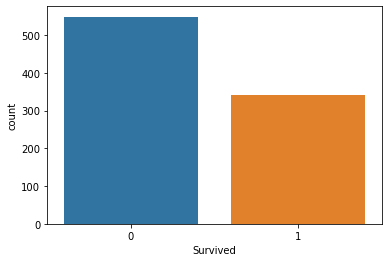

In [8]:
# Visualizing the count of survivors
sns.countplot(titanicda['Survived'])

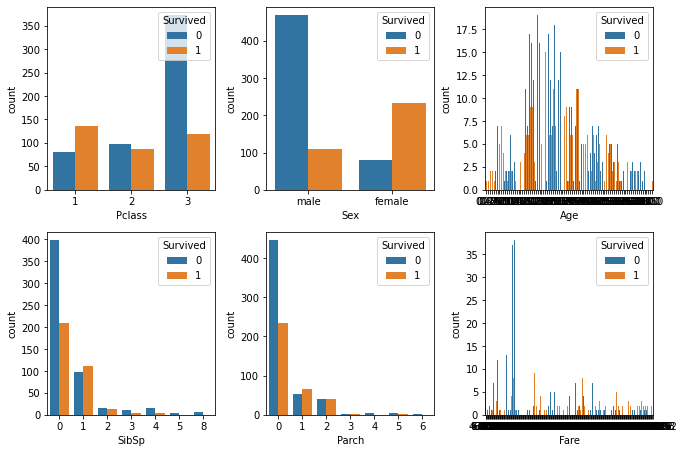

In [9]:
#Visualizing the count of survivors for columns 'Pclass' ,'Name' , 'Sex' , 'Age' , 'SibSp', 'Parch' , 'Ticket', 'Fare' , 'Cabin' , 'Embarked'

cols = ['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' ,'Fare' , 'Cabin' , 'Embarked']

n_rows = 2
n_cols = 3

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        ax = axs[r][c]
        sns.countplot(titanicda[cols[i]], hue=titanicda['Survived'], ax=ax)
        ax.legend(title='Survived' , loc = 'upper right')

plt.tight_layout()

In [10]:
#Looking at survival rate by sex
titanicda.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
#Looking at survival rate by sex and class
titanicda.pivot_table('Survived' , index= 'Sex' , columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

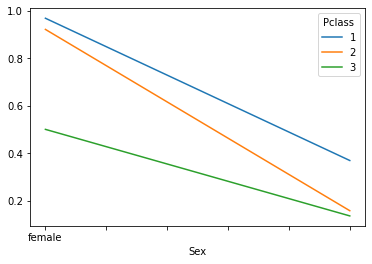

In [12]:
#Looking at survival rate by sex and class after visualization
titanicda.pivot_table('Survived' , index='Sex' , columns='Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

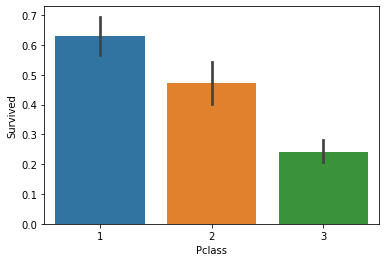

In [13]:
#survival rate of each class
sns.barplot(x='Pclass' , y='Survived' , data= titanicda)

In [14]:
# Looking ar survival rate by sex, age and Pclass
Age = pd.cut(titanicda['Age'],[0,18,80])
titanicda.pivot_table('Survived', ['Sex', Age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

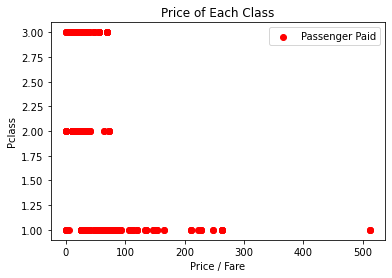

In [15]:
# Plotting the prices paid of each Pclass
plt.scatter(titanicda['Fare'], titanicda['Pclass'], color='red' , label='Passenger Paid')
plt.ylabel('Pclass')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [16]:
#Counting the empty values in each column
titanicda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#looking at all of the values in each column & getting a count
for val in titanicda:
    print(titanicda[val].value_counts())
    print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Christmann, Mr. Emil                         1
Hays, Miss. Margaret Bechstein               1
Thorneycroft, Mr. Percival                   1
Chronopoulos, Mr. Apostolos                  1
Becker, Master. Richard F                    1
                                            ..
Sharp, Mr. Percival James R                  1
Bateman, Rev. Robert James                   1
Lang, Mr. Fang                               1
Petroff, Mr. Pastcho ("Pentcho")             1
Stone, Mrs. George Nelson (Martha Evelyn)    1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, 

In [18]:
#Dropping the columns
titanicda= titanicda.drop(['Parch', 'Name', 'Sex' , 'SibSp'] , axis = 1)

#Removing the rows with missing values
titanicda = titanicda.dropna( subset = ['Age', 'Cabin' , 'Embarked'])

In [19]:
#Counting the NEW number of rows and columns in the data set
titanicda.shape

(183, 8)

In [20]:
#Looking new data types
titanicda.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encoding the Age column
titanicda.iloc[:, 4] = labelencoder.fit_transform(titanicda.iloc[:, 4].values )

#Encoding the Cabin column
titanicda.iloc[:, 6] = labelencoder.fit_transform(titanicda.iloc[:, 6].values )

#Encoding the Embarked column
titanicda.iloc[:, 7] = labelencoder.fit_transform(titanicda.iloc[:, 7].values )

In [22]:
#Printing the unique values in the columns
print(titanicda['Age'].unique())
print(titanicda['Embarked'].unique())

[38.   35.   54.    4.   58.   34.   28.   19.   49.   65.   45.   29.
 25.   23.   46.   71.   21.   47.   24.   32.5  37.   36.5  22.   61.
 56.   50.    1.    3.   44.    2.   40.   31.   32.   62.   30.   52.
 63.   36.    0.92 17.   18.   16.   45.5  41.   60.   27.   33.   14.
 64.   48.   55.   39.   53.   42.   80.   15.   70.    6.   51.   57.
 43.   11.   26.  ]
[0 2 1]


In [27]:
#Splitting the data into independent 'X' and dependent 'Y' variables
X = titanicda.iloc[:, 2:8].values
Y = titanicda.iloc[:, 1].values


In [41]:
X.shape

(183, 6)

In [40]:
Y.shape

(183,)

In [29]:
# Splitting the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=0)

In [30]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
#Creating a function with machine learnning models
def models(X_train, Y_train):

    #Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Using KNeighbor
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors =5, metric ='minkowski' , p=2)
    knn.fit(X_train, Y_train)
    
    #Using SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'rbf' , random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    #Using SVC (rbf kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel ='rbf' , random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #Using GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Using Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)
    tree.fit(X_train, Y_train)
    
    #Using the RnadomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10 , criterion = 'entropy' , random_state = 0)
    forest.fit(X_train, Y_train)
    
    #Printing the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ' , log.score(X_train, Y_train))
    print('[1]K Neighbors Training Accuracy: ' , knn.score(X_train, Y_train))
    print('[2]SVC Linear Regression Training Accuracy: ' , svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF Regression Training Accuracy: ' , svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Regression Training Accuracy: ' , gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ' , tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy: ' , forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [32]:
#Getting and training all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.6643835616438356
[1]K Neighbors Training Accuracy:  0.7465753424657534
[2]SVC Linear Regression Training Accuracy:  0.7191780821917808
[3]SVC RBF Regression Training Accuracy:  0.7191780821917808
[4]Gaussian NB Regression Training Accuracy:  0.6712328767123288
[5]Decision Tree Training Accuracy:  1.0
[6]Random Forest Training Accuracy:  0.9794520547945206


In [33]:
#Showing the confusion matrix and accuracy for all of the models on the test data
from sklearn.metrics import confusion_matrix
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

for i in range( len(model) ):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    #Extracting TN, FP, FN, TP
    TN = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    FP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    FN = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i,test_score))
    print()

[[ 1  6]
 [ 8 22]]
Model[0] Testing Accuracy = "[0.5 0.5 0.5 0.5]"

[[ 3  4]
 [ 6 24]]
Model[1] Testing Accuracy = "[0.5 0.5 0.5 0.5]"

[[ 1  6]
 [ 3 27]]
Model[2] Testing Accuracy = "[0.5 0.5 0.5 0.5]"

[[ 1  6]
 [ 3 27]]
Model[3] Testing Accuracy = "[0.5 0.5 0.5 0.5]"

[[ 3  4]
 [12 18]]
Model[4] Testing Accuracy = "[0.5 0.5 0.5 0.5]"

[[ 4  3]
 [10 20]]
Model[5] Testing Accuracy = "[0.5 0.5 0.5 0.5]"

[[ 3  4]
 [11 19]]
Model[6] Testing Accuracy = "[0.5 0.5 0.5 0.5]"



In [35]:
#Getting feature importance
forest = model[6]
importances = pd.DataFrame({'feature' : titanicda.iloc[: , 2:8].columns, 'importance' : np.round(forest.feature_importances_ , 3)})
importances = importances.sort_values('importance' , ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.311
Cabin,0.251
Ticket,0.202
Fare,0.199
Embarked,0.020
Pclass,0.017


<AxesSubplot:xlabel='feature'>

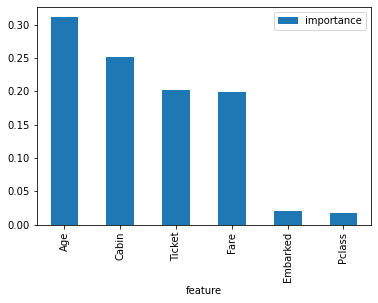

In [36]:
#Visualization
importances.plot.bar()

In [37]:
#printing the prediction of the random forest classifier
predictions = model[6].predict(X_test)
print(predictions)

print()

#Printing the actual values
print(Y_test)

[0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1]

[1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1]


In [39]:
#Survivor

survivors = [[2,6,2,1,1,8]]

#Scaling survivors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
survivors_scaled = sc.fit_transform(survivors)

#Printing prediction of survivors using Random Forest Classifier
predictions = model[6].predict(survivors_scaled)
print(predictions)

if predictions == 0:
    print('You did not survive')
else:
    print('You survived')    

[1]
You survived
